<b><font size="6"><u>Feature Selection</u></font></b>

**Feature Engineering** aims to create new features from the original ones with the goal of creating models more
effective and with higher performance.

**Feature Selection** allows to select features from all the features available (the original ones and the created
ones) to enable the creation of more efficient models.

In this notebook we will mainly focus on feature selection. Summing up, the objective is to come up with some procedures to rank different features according to their discrimination ability.

<div>
<img src="https://drive.google.com/uc?id=1dOC-kYAUdGjEmTLHagpoG9Z43XzgetsQ" width="500"/> <img name="featureselectionintuition.png">
</div>

**Why Feature Selection is necessary:**
- Performance improvement (reduce overfitting)
- Shorter training time
- Interpretability
- Avoid redundancy


# <font color='#BFD72F'>Contents</font> <a class="anchor" id="toc"></a>


* [1 - Initial Steps](#first-bullet)
    * [1.1 - Connect to Google Colab](#first-bullet)
    * [1.2 - Importing Libraries and Data](#import)    
* [2 - Feature Selection Techniques](#second-bullet)
 * [2.1 - Filter Methods](#filter)
    * [2.1.1 - Pearson Correlation](#pearson)
    * [2.1.2 - Spearman Correlation](#spearman)
    * [2.1.3 - Pearson and Spearman Correlation](#pearson-spea)
    * [2.1.4 - ANOVA](#anova)
    * [2.1.5 - Chi-Square](#chi2)
 * [2.2. - Wrapper Methods](#wrapper)
    * [2.2.1 - RFE](#rfe)
  * [2.3. - Embedded Methods](#embedded)
    * [2.3.1 - Lasso Regression](#lasso)

# <font color='#BFD72F'>1. Initial Steps</font> <a class="anchor" id="first-bullet"></a>

## <font color='#BFD72F'>1.1. Connect to Google Colab</font> <a class="anchor" id="colab"></a>

[Back to Contents](#toc)

**Step 1 -** Connect the google colab notebook with your google drive. Before running the code below, make sure you have this notebook in the folders mentioned in the variable `path`.<br>

In [1]:
# Connect Google Colab to Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/DM2/LAB02 - Feature Selection and Model Evaluation/'

Mounted at /content/drive


## <font color='#BFD72F'>1.2. Importing Libraries and Data</font> <a class="anchor" id="import"></a>
[Back to Contents](#toc)

**Step 2 -** Import the needed libraries.

Note: For better undestanding of the contents we will import most packages on a need basis.
However, importing everything that you intend to use in a single cell is generally regarded as a desirable good practice.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

**Step 3 -** Import the data that is going to be used into `pandas` dataframes.

**Step 3.1 -** Import and check the Boston dataset.

In [3]:
# numerical input, numerical output
boston = pd.read_csv(path + 'data/Boston.csv')
boston.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


<font color='orange'>____GOAL____:   </font> Predict the prices of houses using the given features.

`CRIM`: Per capita crime rate by town <br>
`ZN`: Proportion of residential land zoned for lots over 25,000 sq. ft<br>
`INDUS`: Proportion of non-retail business acres per town<br>
`CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
`NOX`: Nitric oxide concentration (parts per 10 million)<br>
`RM`: Average number of rooms per dwelling<br>
`AGE`: Proportion of owner-occupied units built prior to 1940<br>
`DIS`: Weighted distances to five Boston employment centers<br>
`RAD`: Index of accessibility to radial highways<br>
`TAX`: Full-value property tax rate per 10,000 dollars<br>
`PTRATIO`: Pupil-teacher ratio by town<br>
`B`: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town<br>
`LSTAT`: Percentage of lower status of the population<br>
`MEDV`: Median value of owner-occupied homes in $1000s <font color='orange'> <- **Dependent Variable / Target**</font> <

**Step 3.2 -** Import and check the Insurance dataset.

In [4]:
# categorical and numerical input, categorical output
insurance = pd.read_csv(path +'data/insurance_prep.csv')
insurance.head(3)

,Unnamed: 0,InsuredID,Year_Birth,Smoker,Income,BMI,BSA,Expenses,Treatment,Medication,...,Year_Hospitalization,Region_northwest,Region_southeast,Region_southwest,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Gender_M
0,0,1003,1991.0,0,29761.20,69,11,45.76,32,19,...,2014,0,1,0,0,0,0,0,0,1
1,1,1004,1956.0,0,98249.55,10,26,923.52,60,10,...,2013,0,0,0,0,1,0,0,0,1
2,2,1006,1983.0,0,23505.30,65,14,58.24,47,2,...,2013,0,0,1,0,0,0,1,0,0


<font color='orange'>____GOAL____  : </font> Predict if the health plan will get an upgrade by the customer using the given features.

The original dataset contains 2500 rows of hospitalization data that an insurance company is analysing, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker, Region, etc.


`Insured ID`<br>
`Year_Birth` -  Insurance contractor year of birth<br>
`Gender` - (dummies) Insurance contractor gender, female / male.<br>
`Region` - (dummies) The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
`Marital Status` - (dummies) Insurance contractor marital status<br>
`Smoker` - (dummies) Smoker / Non - smoker.<br>
`Income` - Insurance contractor income.<br>
`BMI` - Body mass index<br>
`BSA` - body surface area.<br>
`Insured_Satisfaction` - Insured satisfaction regarding insurance assistance/services covered during hospitalization.<br>
`Expenses` - Individual medical costs billed by health insurance.<br>
`Expenses in percentage (%)` by categories (Treatment / Medication / Medical_Assistance / Exams / Ambulance_Transport).<br>
`Expenses coverage percentage (%)` (Insurance_Coverage / Patient_Coverage).<br>
`Plan_Option` Type of plan insurance <br>
`Upgrade Health Plan` The customer upgraded the health plan insurance<font color='orange'> <- **Dependent Variable / Target**</font>

# <font color='#BFD72F'>2. Feature Selection Techniques</font> <a class="anchor" id="second-bullet"></a>
[Back to Contents](#toc)

__Recap__: We have three types of Feature Selection Methods.

<div>
<img src="https://drive.google.com/uc?id=1HHF5JwZiKfLkng_qaJSn8kPDS_V1slOP" width="500"/> <img name="selectionmethods.png">
</div>

## <font color='#BFD72F'>2.1 Filter Methods</font><a class="anchor" id="filter"></a>
[Back to Contents](#toc)

<div>
<img src="https://drive.google.com/uc?id=1obLBogRSdw6yGLVwYsduptBE7a276Fp6" width="1000"/> <img name="howtouse.png">
</div>

### <font color='#BFD72F'> 2.1.1. Pearson Correlation</font> <a class="anchor" id="pearson"></a>
[Back to Contents](#toc)

`Numpy`: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html <br>
`Pandas`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

__USING BOSTON DATASET__


**Step 4 -** Check the Pearson correlation of the __boston__ dataset by applying the method `corr()` and assign it to the object `cor_pearson`.

In [5]:
cor_pearson = boston.corr()
cor_pearson

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


**Step 5 -** Create a heatmap using the seaborn package.

<Axes: >

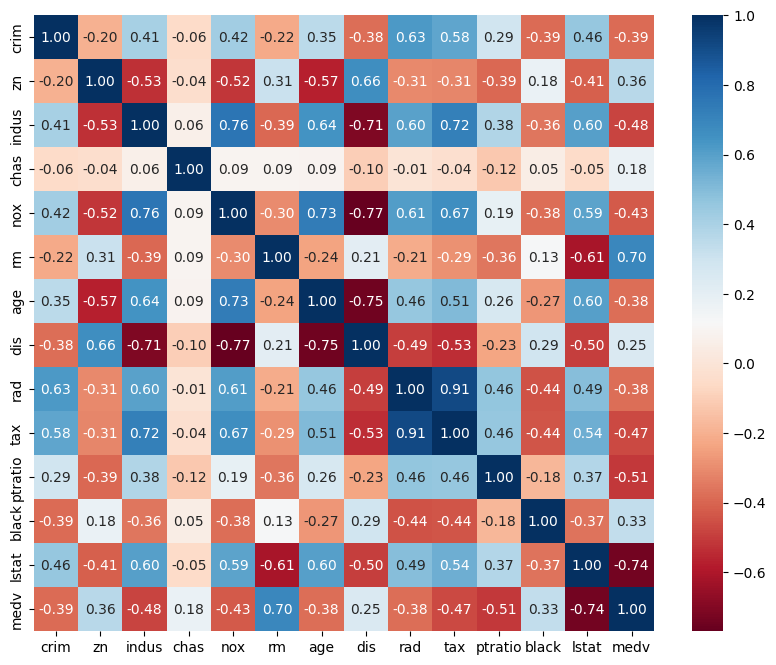

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data=cor_pearson, annot=True, cmap = plt.cm.RdBu, fmt='.2f')

### <font color='#BFD72F'> 2.1.2. Spearman Correlation</font> <a class="anchor" id="spearman"></a>
[Back to Contents](#toc)

`Numpy / Scipy`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html <br>
`Pandas`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

**Step 6 -** Check the spearman correlation of the __boston__ dataset by applying the method `corr()` and assign it to the object `cor_spearman`. <br>
Define the parameter `method = spearman`.

In [7]:
cor_spearman = boston.corr(method ='spearman')

**Step 7 -** Create a heatmap using the `seaborn package`.

<Axes: >

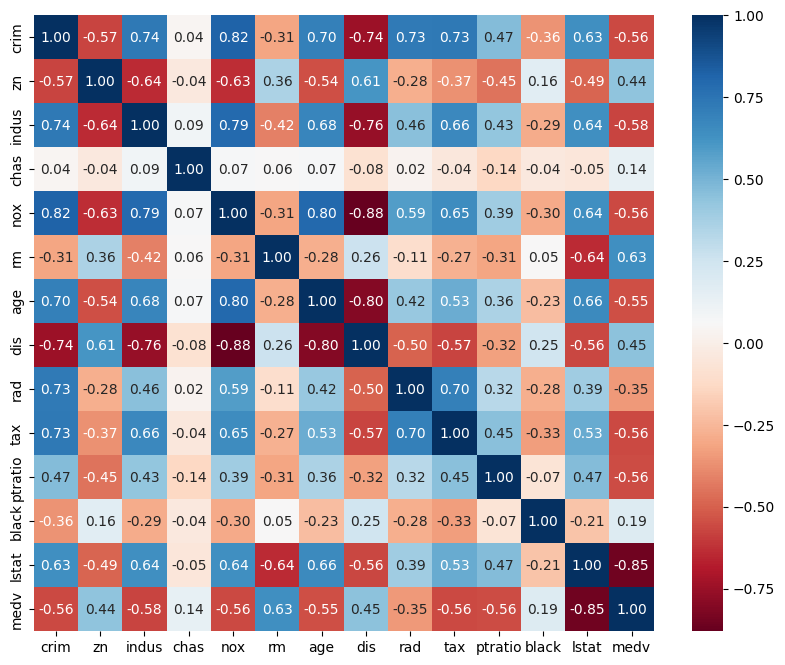

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data=cor_spearman, annot=True, cmap = plt.cm.RdBu, fmt='.2f')

### <font color='#BFD72F'> 2.1.3. Pearson and Spearman Correlation</font> <a class="anchor" id="pearson-spea"></a>
[Back to Contents](#toc)

__Pearson Correlation__ (Parametric)<br>
The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.

<div>
<img src="https://drive.google.com/uc?id=1m_5bkQ8_82KTk_yp1wrTWjkPN9nkOYFL" width="400"/> <img name="pearson.png">
</div>

<div>
<img src="https://drive.google.com/uc?id=1SnaRd64kh2761JcNZtXjRn7u9_DWUEBS" width="500"/> <img name="pearson.jpg">
</div>

__Spearman Correlation__ (Non-Parametric)<br>
The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate.

<div>
<img src="https://drive.google.com/uc?id=1G8e-CdItZaeJ4avTGag-S5WsGAN5tCtf" width="500"/> <img name="spearman.png">
</div>

<div>
<img src="https://drive.google.com/uc?id=1kBvXImQ4tPqdrAx_loMLIGQiNPxP7LRw" width="300"/> <img name="spearmanformula.png">
</div>


__Examples for Pearson and Spearman Correlation__ <br>


<div>
<img src="https://drive.google.com/uc?id=1v5ENN-rR7ymmLSjCw9raBth9b6P1iFWX" width="800"/> <img name="pearson vs spearman.png">
</div>

__Parametric Correlations (Pearson Correlation)__
- uses information about the mean and deviation from the mean, and in that way, more powerful than non-parametric correlations.
- it assumes that the distributions of X and Y should be a normal distribution and also continuous.

__Non-Parametric Correlations (Spearman and Kendall Correlation)__
- less powerful because they use less information in their calculations - they use only the ordinal information and score of pairs.
- It is possible that the X and Y values can be continuous or ordinal, and approximate normal distributions for X and Y are not required.


<font color='Orange'>__Best pratice for correlation method:__</font> <a class="anchor" id="second-bullet"></a>


- High correlation with the output variable
- Low correlation with another input variable

### <font color='#BFD72F'> 2.1.4. ANOVA</font> <a class="anchor" id="anova"></a>
[Back to Contents](#toc)

__USING INSURANCE DATASET__

let's use the numerical variables and relate them to the categorical output `Upgrade_Health_Plan`



**Step 8 -** From __sklearn.feature_selection__ import `f_classif`, this method computes the **ANOVA** F-value for the dataset.  <br>
Import the method `SelectKBest` as well, in order to select automatically the variables with the highest scores.

In [9]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

**Step 9 -** Define the independent variables as `X_insurance` and the dependent variable as `y_insurance`.

In [10]:
X_insurance = insurance[['BMI', 'BSA', 'Expenses', 'Treatment', 'Medication', 'Medical_Assistance', 'Exams',
                  'Ambulance_Transport', 'Patient_Coverage','Insured_Satisfaction', 'Insurance_Coverage']]
y_insurance = insurance['Upgrade_Health_Plan']

**Step 10 -** Using `SelectKBest` and `f_classif`, create a variable called `anova` and initialize by defining the following parameters:
- `score_func` = f_classif
- `k` = 5

In [11]:
anova = SelectKBest(f_classif, k=5)

**Step 11 -** Transform the data using anova by applying the method `fit_transform()` to the instance `anova`, where `X` should be assigned to your independent variables and `y` to the dependent variable and assign it to the object `X_anova`.

In [12]:
X_anova = anova.fit_transform(X_insurance, y_insurance)

**Step 12 -** Check if the variables that were selected by anova as the most "important" ones by calling `get_support()` to `anova`. <br> Create a pandas series named as `selected_features` where the `data = anova.get_support()` and `index = data.columns`.

In [13]:
selected_features = pd.Series(anova.get_support(), index = X_insurance.columns)
selected_features

,0
BMI,False
BSA,True
Expenses,True
Treatment,False
Medication,False
Medical_Assistance,False
Exams,False
Ambulance_Transport,False
Patient_Coverage,True
Insured_Satisfaction,True


### <font color='#BFD72F'>2.1.5. Chi-Square</font> <a class="anchor" id="chi2"></a>
[Back to Contents](#toc)

 **Chi-squared (χ²)** is used to determine whether there is a significant relationship between __two categorical variables__.


<div>
<img src="https://drive.google.com/uc?id=1Q2njhfEVvsH9YtV0sBrl6aFtFUG_jOun" width="300"/> <img name="chisquared.png">
</div>



We reject the null hyphotesis when the Chi-Square value is higher than the critical chi-square value.

**Small Chi-Square value** - When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value.

**High Chi-Square value** - The higher the Chi-square value implies, in simple words, that the feature is more dependent on the target, and it can be selected for model training.
<br><br>

__USING INSURANCE DATASET__

**Step 13 -** From `scipy.stats` import `chi2_contingency`.

In [14]:
from scipy.stats import chi2_contingency

**Step 14 -** Define the independent variables as __X_chi__ and the dependent variable as __y_chi__.

In [15]:
X_chi = insurance[['Smoker','Region_northwest', 'Region_southeast', 'Region_southwest', 'Marital_Status_Divorced',
                   'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Gender_M']]

y_chi = insurance['Upgrade_Health_Plan']

**Step 15 -** Create a contigency table related the `y` and the variable `Smokers` in order to see the relation between them.

In [16]:
pd.crosstab(y_chi, X_chi['Smoker'])

Smoker,0,1
Upgrade_Health_Plan,,
0,1710,615
1,43,132


**Step 16 -** Check the chi2 value for the variable Smoker.

In [17]:
chi2_contingency(pd.crosstab(y_chi, X_chi['Smoker']))[1]

6.489772454798967e-42

**Step 17 -** Check if categorical variables have dependency with target.

In [18]:
chi2_check = []

for i in X_chi.columns:
    # chi2 statistic

    if chi2_contingency(pd.crosstab(y_chi, X_chi[i]))[1] < 0.05: # if p-value < 0.05, reject H0, keep feature
        chi2_check.append('Keep Feature')
    else:
        chi2_check.append('Discard Feature')

res = pd.DataFrame(data = [X_chi.columns, chi2_check]).T
res.columns = ['Column', 'Suggestion']
res

,Column,Suggestion
0,Smoker,Keep Feature
1,Region_northwest,Discard Feature
2,Region_southeast,Discard Feature
3,Region_southwest,Discard Feature
4,Marital_Status_Divorced,Discard Feature
5,Marital_Status_Married,Discard Feature
6,Marital_Status_Single,Keep Feature
7,Marital_Status_Together,Discard Feature
8,Marital_Status_Widow,Keep Feature
9,Gender_M,Discard Feature


__Null Hypothesis (H0)__ : There is no relationship between the variables <br>
__Alternative Hypothesis(H1):__  There is a relationship between variables

If the p-value is smaller than 0.05 we have statistical evidence to reject H0. <br>When this is the case we suggest to keep the feature and discard it otherwise.


## <font color='#BFD72F'>2.2. Wrapper Methods</font> <a class="anchor" id="wrapper"></a>
[Back to Contents](#toc)

<div>
<img src="https://drive.google.com/uc?id=1LpcZ8r9nM4y9kvGM-kWXtiJiFT7l8usP" width="600"/> <img name="wrapper methods.png">
</div>


### <font color='#BFD72F'> 2.2.1. RFE ( Recursive Feature Elimination)</font> <a class="anchor" id="rfe"></a>
[Back to Contents](#toc)

This time we are going to apply  (RFE / Backwards) that will allow to select the most important features to keep.<br> The base estimator used will be a Logistic Regression.

__USING INSURANCE DATASET__

**Step 18 -** Assign to the object `data` the values from __insurance__ except the dependent variable.

In [19]:
data = insurance.loc[:, insurance.columns != 'Upgrade_Health_Plan']

**Step 19 -** Assign to the object `target` (__Upgrade_Health_Plan__) the dependent variable from boston.

In [20]:
target = insurance['Upgrade_Health_Plan']

**Step 20 -** Import the `MinMaxScaler` package.

In [21]:
from sklearn.preprocessing import MinMaxScaler

**Step 21 -** Scale the data.

In [22]:
scaler = MinMaxScaler()
data_sca = scaler.fit_transform(data)
data_sca = pd.DataFrame(data_sca, columns = data.columns, index = data.index)
data_sca

,Unnamed: 0,InsuredID,Year_Birth,Smoker,Income,BMI,BSA,Expenses,Treatment,Medication,...,Year_Hospitalization,Region_northwest,Region_southeast,Region_southwest,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Gender_M
0,0.000000,0.0000,0.900000,0.0,0.206381,0.125683,0.145455,0.012287,0.312500,0.279412,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000400,0.0001,0.316667,0.0,0.681319,0.018215,0.418182,0.300341,0.604167,0.147059,...,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.000800,0.0003,0.766667,0.0,0.162999,0.118397,0.200000,0.016382,0.468750,0.029412,...,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.001200,0.0004,0.550000,0.0,0.505942,0.132969,0.272727,0.115017,0.718750,0.102941,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.001601,0.0006,0.066667,1.0,0.797296,0.136612,0.490909,0.475427,0.375000,0.132353,...,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.998399,0.9992,0.983333,0.0,0.204925,0.074681,0.127273,0.012969,0.093750,0.588235,...,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2496,0.998800,0.9994,0.050000,1.0,0.919294,0.065574,0.781818,0.758703,0.312500,0.058824,...,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2497,0.999200,0.9996,0.300000,1.0,0.636379,0.001821,0.400000,0.282935,0.562500,0.117647,...,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2498,0.999600,0.9997,0.400000,0.0,0.687115,0.001821,0.454545,0.303072,0.687500,0.073529,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Step 22 -** Using `LogisticRegression` from `sklearn.linear_model`, create an instance called `model`.

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

**Step 23 -** Using RFE, create a RFE instance called `rfe` and initialize by defining the following parameters:
- `estimator` = model
- `n_features_select` = 10

In [24]:
rfe = RFE(estimator = model, n_features_to_select = 10)

**Step 24 -** Transform the data using RFE by applying the method `fit_transform()` to the instance `rfe`, where `X` should be assigned to your independent varaibles and `y` to the dependent variable and assign it to the object `X_rfe`.

In [25]:
X_rfe = rfe.fit_transform(X = data_sca, y = target)
X_rfe

array([[0.        , 0.14545455, 0.01228669, ..., 0.4       , 1.        ,
        0.        ],
       [0.        , 0.41818182, 0.3003413 , ..., 0.8       , 0.5       ,
        0.        ],
       [0.        , 0.2       , 0.01638225, ..., 0.6       , 0.5       ,
        1.        ],
       ...,
       [1.        , 0.4       , 0.28293515, ..., 0.6       , 0.5       ,
        0.        ],
       [0.        , 0.45454545, 0.30307167, ..., 0.8       , 0.        ,
        0.        ],
       [0.        , 0.63636364, 0.5665529 , ..., 0.8       , 1.        ,
        0.        ]])

**Step 25 -** Check the variables that were selected by RFE as the most "important" ones by calling the attribute `support_` to `rfe`.

In [26]:
rfe.support_

array([False, False, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True, False, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False])

**Step 26 -** Check the ranking of the variables defined by RFE as the most "important" ones by applying the attribute `ranking_` to `rfe`.

In [27]:
rfe.ranking_

array([ 2,  8,  6,  1,  5, 14,  1,  1,  1,  3,  1,  1,  1, 10, 17,  1, 18,
        1,  4, 12,  1,  7, 13, 16, 15, 11,  9])

**Step 27 -** Create a pandas Series named `selected_features` that will have as index the `data` columns names and the `support_` attribute as value.

In [28]:
selected_features = pd.Series(rfe.support_, index = data.columns)
selected_features

,0
Unnamed: 0,False
InsuredID,False
Year_Birth,False
Smoker,True
Income,False
BMI,False
BSA,True
Expenses,True
Treatment,True
Medication,False


## <font color='#BFD72F'>2.3. Embedded Methods</font> <a class="anchor" id="embedded"></a>
[Back to Contents](#toc)

### <font color='#BFD72F'> 2.3.1. Lasso Regression</font> <a class="anchor" id="lasso"></a>
[Back to Contents](#toc)

Using Lasso Regression (also known as L1-Regularization)  a a penalty term is added to the traditional least squares objective function of linear regression. By doing so, lasso regression encourages sparsity in the coefficient values, meaning it tends to force the coefficients of irrelevant or less important features to be exactly zero.

**Step 28 -** Using `LassoCV`, create a Lasso Regression instance called `reg`.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [29]:
reg = LassoCV(cv=5, random_state=15)

**Step 29 -** Fit the model.

In [30]:
reg.fit(data_sca, target)

LassoCV(cv=5, random_state=15)

**Step 30 -** Extract the coefficients and print them in order.

In [31]:
coef = pd.Series(reg.coef_, index = data_sca.columns)
coef.sort_values()

,0
BSA,-6.973864e-01
Income,-4.805060e-02
Insured_Satisfaction,-3.662143e-02
Region_southwest,-3.646743e-02
Ambulance_Transport,-1.029041e-02
Region_southeast,-6.967562e-03
Marital_Status_Married,-6.915977e-03
Gender_M,-6.125224e-03
BMI,-5.737133e-03
Marital_Status_Together,-2.481350e-04


**Step 31 -** Plot the coefficients in a bar chart.

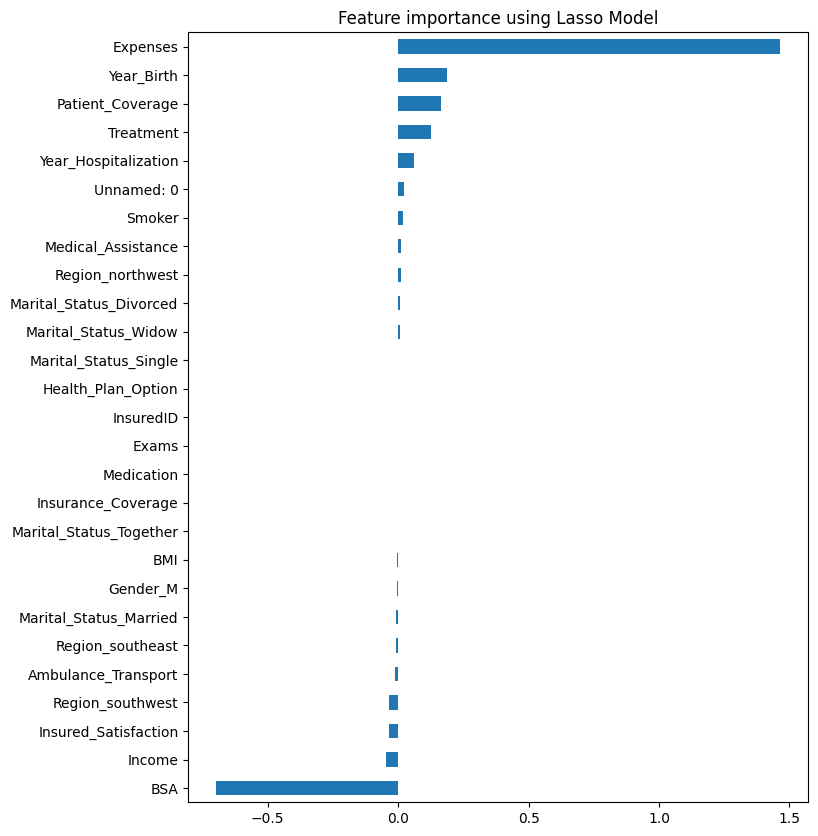

In [32]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

plot_importance(coef,'Lasso')

Regarding the Lasso-Model you would discard every feature which is exactly 0.

<b><font size="6"> Don't forget to practice at home &#128521;</font>